# Import Required Libraries

In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler


# setting to make numbers easier to read on display
pd.options.display.float_format='{:20.2f}'.format

#show all columns on output 
pd.set_option('display.max_columns', 999)

# Data Exploration 

In [71]:
df=pd.read_excel("./data/online_retail_II.xlsx", sheet_name=0)
df.head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,2009-12-01 07:45:00,1.65,13085.00,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,2009-12-01 07:45:00,5.95,13085.00,United Kingdom
8,489435,22350,CAT BOWL,12,2009-12-01 07:46:00,2.55,13085.00,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,2009-12-01 07:46:00,3.75,13085.00,United Kingdom


### Check the summery

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      525461 non-null  object        
 1   StockCode    525461 non-null  object        
 2   Description  522533 non-null  object        
 3   Quantity     525461 non-null  int64         
 4   InvoiceDate  525461 non-null  datetime64[ns]
 5   Price        525461 non-null  float64       
 6   Customer ID  417534 non-null  float64       
 7   Country      525461 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.1+ MB


from the above the customer id has so many missing values.and the invoiceDate is already in datetime

### Statistical information for numerical values

In [73]:
df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,525461.00,525461,525461.00,417534.00
mean,10.34,2010-06-28 11:37:36.845017856,4.69,15360.65
min,-9600.00,2009-12-01 07:45:00,-53594.36,12346.00
25%,1.00,2010-03-21 12:20:00,1.25,13983.00
50%,3.00,2010-07-06 09:51:00,2.10,15311.00
75%,10.00,2010-10-15 12:45:00,4.21,16799.00
max,19152.00,2010-12-09 20:01:00,25111.09,18287.00
std,107.42,NaN,146.13,1680.81


from the above the quantity has some negative values . quantity dont have any negative values in real life so we want pasitive quantity values .and also price column have negative values

### Check for categorical variables

In [74]:
df.describe(include="O")

,Invoice,StockCode,Description,Country
count,525461,525461,522533,525461
unique,28816,4632,4681,40
top,537434,85123A,WHITE HANGING HEART T-LIGHT HOLDER,United Kingdom
freq,675,3516,3549,485852


### Check missing customers

In [75]:
df[df["Customer ID"].isna()].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
263,489464,21733,85123a mixed,-96,2009-12-01 10:52:00,0.00,NaN,United Kingdom
283,489463,71477,short,-240,2009-12-01 10:52:00,0.00,NaN,United Kingdom
284,489467,85123A,21733 mixed,-192,2009-12-01 10:53:00,0.00,NaN,United Kingdom
470,489521,21646,NaN,-50,2009-12-01 11:44:00,0.00,NaN,United Kingdom
577,489525,85226C,BLUE PULL BACK RACING CAR,1,2009-12-01 11:49:00,0.55,NaN,United Kingdom
578,489525,85227,SET/6 3D KIT CARDS FOR KIDS,1,2009-12-01 11:49:00,0.85,NaN,United Kingdom
1055,489548,22271,FELTCRAFT DOLL ROSIE,1,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1056,489548,22254,FELT TOADSTOOL LARGE,12,2009-12-01 12:32:00,1.25,NaN,United Kingdom
1057,489548,22273,FELTCRAFT DOLL MOLLY,3,2009-12-01 12:32:00,2.95,NaN,United Kingdom
1058,489548,22195,LARGE HEART MEASURING SPOONS,1,2009-12-01 12:32:00,1.65,NaN,United Kingdom


### Check Negative quantity

In [76]:
df[df["Quantity"]<0].head(10)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
183,C489449,21871,SAVE THE PLANET MUG,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
184,C489449,84946,ANTIQUE SILVER TEA GLASS ETCHED,-12,2009-12-01 10:33:00,1.25,16321.00,Australia
185,C489449,84970S,HANGING HEART ZINC T-LIGHT HOLDER,-24,2009-12-01 10:33:00,0.85,16321.00,Australia
186,C489449,22090,PAPER BUNTING RETRO SPOTS,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
196,C489459,90200A,PURPLE SWEETHEART BRACELET,-3,2009-12-01 10:44:00,4.25,17592.00,United Kingdom


### check invoice (6 digit og code is invoice here 7 digit)with 6 digit

In [77]:
df["Invoice"]=df["Invoice"].astype("str")
df[df["Invoice"].str.match("^\\d{6}$")==False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,2009-12-01 10:33:00,1.65,16321.00,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,2009-12-01 10:33:00,4.25,16321.00,Australia
181,C489449,21896,POTTING SHED TWINE,-6,2009-12-01 10:33:00,2.10,16321.00,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,2009-12-01 10:33:00,2.95,16321.00,Australia
...,...,...,...,...,...,...,...,...
524695,C538123,22956,36 FOIL HEART CAKE CASES,-2,2010-12-09 15:41:00,2.10,12605.00,Germany
524696,C538124,M,Manual,-4,2010-12-09 15:43:00,0.50,15329.00,United Kingdom
524697,C538124,22699,ROSES REGENCY TEACUP AND SAUCER,-1,2010-12-09 15:43:00,2.95,15329.00,United Kingdom
524698,C538124,22423,REGENCY CAKESTAND 3 TIER,-1,2010-12-09 15:43:00,12.75,15329.00,United Kingdom


### Check the length of above 6 digit invoices

In [78]:
len(df[df["Invoice"].str.match("^\\d{6}$")==False])

10209

### if check unique values its so many numerical invoices so i convert numerical invoices to empty spaces("[0-9]"to" ")

In [79]:
df["Invoice"].str.replace("[0-9]","",regex=True).unique()

array(['', 'C', 'A'], dtype=object)

### Check the invoices are startswith A

In [80]:
df[df["Invoice"].str.startswith("A")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,2010-04-29 13:36:00,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,2010-07-19 11:24:00,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,2010-10-20 12:04:00,-38925.87,NaN,United Kingdom


here the information is not required so i clean this above data during cleaning process

## check values in stockcode

here also 5 digit code is stockcode check whether string is include this or not

In [81]:
df["StockCode"]=df["StockCode"].astype("str")
df[df["StockCode"].str.match("^\\d{5}$")==False]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
12,489436,48173C,DOOR MAT BLACK FLOCK,10,2009-12-01 09:06:00,5.95,13078.00,United Kingdom
23,489436,35004B,SET OF 3 BLACK FLYING DUCKS,12,2009-12-01 09:06:00,4.65,13078.00,United Kingdom
28,489436,84596F,SMALL MARSHMALLOWS PINK BOWL,8,2009-12-01 09:06:00,1.25,13078.00,United Kingdom
...,...,...,...,...,...,...,...,...
525387,538170,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525388,538170,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2,2010-12-09 19:32:00,3.75,13969.00,United Kingdom
525389,538170,85232B,SET OF 3 BABUSHKA STACKING TINS,2,2010-12-09 19:32:00,4.95,13969.00,United Kingdom
525435,538171,47591D,PINK FAIRY CAKE CHILDRENS APRON,1,2010-12-09 20:01:00,1.95,17530.00,United Kingdom


####  print the unique values 

In [82]:
df["StockCode"]=df["StockCode"].astype("str")
df[(df["StockCode"].str.match("^\\d{5}$")==False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")==False)]["StockCode"].unique()

array(['POST', 'D', 'DCGS0058', 'DCGS0068', 'DOT', 'M', 'DCGS0004',
       'DCGS0076', 'C2', 'BANK CHARGES', 'DCGS0003', 'TEST001',
       'gift_0001_80', 'DCGS0072', 'gift_0001_20', 'DCGS0044', 'TEST002',
       'gift_0001_10', 'gift_0001_50', 'DCGS0066N', 'gift_0001_30',
       'PADS', 'ADJUST', 'gift_0001_40', 'gift_0001_60', 'gift_0001_70',
       'gift_0001_90', 'DCGSSGIRL', 'DCGS0006', 'DCGS0016', 'DCGS0027',
       'DCGS0036', 'DCGS0039', 'DCGS0060', 'DCGS0056', 'DCGS0059', 'GIFT',
       'DCGSLBOY', 'm', 'DCGS0053', 'DCGS0062', 'DCGS0037', 'DCGSSBOY',
       'DCGSLGIRL', 'S', 'DCGS0069', 'DCGS0070', 'DCGS0075', 'B',
       'DCGS0041', 'ADJUST2', '47503J ', 'C3', 'SP1002', 'AMAZONFEE'],
      dtype=object)

1. ```df["StockCode"].str.match("^\\d{5}$")```
   * ```^``` → Start of the string.
   * ```\d{5}``` → Exactly 5 digits (```\d``` means digit, ```{5}``` means ```5``` times).
   * ```$``` → End of the string.
   * This matches StockCodes that are exactly 5 digits long (e.g., ```"12345"```).
   * ```== False``` means we exclude these.
2. ```df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")```
   * ```^``` → Start of the string.
   * ```\d{5}``` → First 5 characters must be digits.
   * ```[a-zA-Z]+``` → Followed by at least one letter (uppercase or lowercase).
   * ```$``` → End of the string.
   * Matches StockCodes like ```"12345A"```, ```"67890XYZ"```, etc.
   * ```== False``` means we exclude these as well.
3. Combining the conditions with ```&``` (AND)
   * We select rows where ```StockCode``` does not match either pattern.
   * This filters out all values that are not:
          * Exactly 5 digits (e.g., ```"12345"```)
          * 5 digits followed by letters (e.g., ```"12345ABC"```)

















In [83]:
len(df[(df["StockCode"].str.match("^\\d{5}$")==False) & (df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")==False)])

3098

### check individual of above

In [84]:
df[df["StockCode"].str.contains("^POST")]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
89,489439,POST,POSTAGE,3,2009-12-01 09:28:00,18.00,12682.00,France
126,489444,POST,POSTAGE,1,2009-12-01 09:55:00,141.00,12636.00,USA
173,489447,POST,POSTAGE,1,2009-12-01 10:10:00,130.00,12362.00,Belgium
625,489526,POST,POSTAGE,6,2009-12-01 11:50:00,18.00,12533.00,Germany
927,C489538,POST,POSTAGE,-1,2009-12-01 12:18:00,9.58,15796.00,United Kingdom
...,...,...,...,...,...,...,...,...
522916,537967,POST,POSTAGE,1,2010-12-09 11:31:00,18.00,12494.00,France
522930,537995,POST,POSTAGE,2,2010-12-09 11:39:00,18.00,12712.00,Germany
522974,538003,POST,POSTAGE,8,2010-12-09 12:05:00,18.00,12429.00,Denmark
523064,538008,POST,POSTAGE,5,2010-12-09 12:17:00,18.00,12683.00,France


| StockCode      | Include/Exclude | Reason |
|---------------|---------------|----------------------------------------------------------|
| POST          | Exclude       | Likely represents postage/shipping, not a product. |
| D             | Exclude       | Too generic, unclear purpose. |
| DCGS0058      | Exclude       | Appears to be a product code, but unclear if it’s related to PADS. |
| DCGS0068      | Exclude       | Similar to above, might be another product category. |
| DOT          | Exclude       | Ambiguous, does not indicate a product. |
| M             | Exclude       | Single-letter codes are often non-product identifiers. |
| DCGS0004      | Exclude       | Appears to be a specific product, but not related to PADS. |
| DCGS0076      | Exclude       | Similar to above, another product. |
| C2           | Exclude       | Likely a category or classification. |
| BANK CHARGES | Exclude       | Clearly not a product. |
| TEST001      | Exclude       | Appears to be a test entry in the dataset. |
| TEST002      | Exclude       | Another test entry. |
| PADS         | **Include**    | Matches the filter criteria for cushion pads. |
| ADJUST       | Exclude       | Likely an adjustment entry, not a product. |
| ADJUST2      | Exclude       | Another adjustment entry. |
| AMAZONFEE    | Exclude       | Likely a fee charge, not a product. |
| GIFT         | Exclude       | Too generic, might not be a specific product. |
| All other `DCGSxxxx` codes | Exclude | These seem to be product codes but unrelated to PADS. |


# Data Cleaning

In [85]:
cleaned_df=df.copy()

### clean unnecessary data in invoice

In [86]:
cleaned_df["Invoice"]=cleaned_df["Invoice"].astype("str")
mask=(
    cleaned_df["Invoice"].str.match("^\\d{6}$")==True
)

cleaned_df=cleaned_df[mask]

cleaned_df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


* Applies the mask to `cleaned_df`, keeping only rows where `"Invoice"` is a 6-digit number.
* Removes invoices that:
     * Contain letters (e.g., `"A12345"`, `"INV987"`).
     * Are longer/shorter than 6 digits (e.g., `"12345"`, `"1234567"`).
     * Have special characters (e.g., `"123-456"`).





### clean unnecessary data in stockCode

In [87]:
cleaned_df["StockCode"]=cleaned_df["StockCode"].astype("str")

mask=(
    (cleaned_df["StockCode"].str.match("^\\d{5}$")==True)
    | (cleaned_df["StockCode"].str.match("^\\d{5}[a-zA-Z]+$")==True)
    | (cleaned_df["StockCode"].str.match("^PADS$")==True)
    )


cleaned_df=cleaned_df[mask]

cleaned_df


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom
...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom


1. ✅ Keeps StockCodes that are:
      * Exactly 5 digits (e.g., "12345", "56789").
      * 5 digits followed by letters (e.g., "12345A", "67890XYZ").
      * Exactly "PADS".
2. ❌ Excludes Everything Else, including:
       * Random codes (e.g., "ABC123", "TEST001", "MISC").
       * Fees or adjustments (e.g., "POST", "BANK CHARGES", "AMAZONFEE").
       * Other stock codes that don’t follow the 5-digit rule.

In [88]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,512796.00,512796,512796.00,406337.00
mean,11.00,2010-06-28 18:26:52.709732352,3.39,15373.63
min,-9600.00,2009-12-01 07:45:00,0.00,12346.00
25%,1.00,2010-03-21 13:27:00,1.25,14004.00
50%,3.00,2010-07-06 14:25:00,2.10,15326.00
75%,10.00,2010-10-15 14:50:00,4.21,16814.00
max,19152.00,2010-12-09 20:01:00,1157.15,18287.00
std,104.35,NaN,5.07,1677.37


from above quantity have negative values we check earlier most of negative quantity values have nan customer id so we drop the custmer id for better

dropnan values in customer id

In [89]:
cleaned_df.dropna(subset=["Customer ID"], inplace=True)

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8916\1633333693.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df.dropna(subset=["Customer ID"], inplace=True)


In [90]:
cleaned_df.describe()

,Quantity,InvoiceDate,Price,Customer ID
count,406337.00,406337,406337.00,406337.00
mean,13.62,2010-07-01 10:11:06.543288320,2.99,15373.63
min,1.00,2009-12-01 07:45:00,0.00,12346.00
25%,2.00,2010-03-26 14:01:00,1.25,14004.00
50%,5.00,2010-07-09 15:48:00,1.95,15326.00
75%,12.00,2010-10-14 17:09:00,3.75,16814.00
max,19152.00,2010-12-09 20:01:00,295.00,18287.00
std,97.00,NaN,4.29,1677.37


### Check price

In [91]:
cleaned_df[cleaned_df["Price"]==0]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
4674,489825,22076,6 RIBBONS EMPIRE,12,2009-12-02 13:34:00,0.00,16126.00,United Kingdom
6781,489998,48185,DOOR MAT FAIRY CAKE,2,2009-12-03 11:19:00,0.00,15658.00,United Kingdom
18738,490961,22065,CHRISTMAS PUDDING TRINKET POT,1,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
18739,490961,22142,CHRISTMAS CRAFT WHITE FAIRY,12,2009-12-08 15:25:00,0.00,14108.00,United Kingdom
32916,492079,85042,ANTIQUE LILY FAIRY LIGHTS,8,2009-12-15 13:49:00,0.00,15070.00,United Kingdom
40101,492760,21143,ANTIQUE GLASS HEART DECORATION,12,2009-12-18 14:22:00,0.00,18071.00,United Kingdom
47126,493761,79320,FLAMINGO LIGHTS,24,2010-01-06 14:54:00,0.00,14258.00,United Kingdom
48342,493899,22355,"CHARLOTTE BAG , SUKI DESIGN",10,2010-01-08 10:43:00,0.00,12417.00,Belgium
57619,494607,21533,RETRO SPOT LARGE MILK JUG,12,2010-01-15 12:43:00,0.00,16858.00,United Kingdom
111348,500073,21662,VINTAGE GLASS COFFEE CADDY,1,2010-03-04 11:44:00,0.00,13047.00,United Kingdom


In [92]:
cleaned_df["Price"].min()

0.0

# check how many values we reject during data cleaning

In [93]:
len(cleaned_df)/len(df)

0.7732962103752705

I drop 23% of records during datacleaning

# Feature Engineering

#### create sociallinetotal(totalprize) column

In [94]:
cleaned_df["SalesLineTotal"]=cleaned_df["Quantity"] * cleaned_df["Price"]
cleaned_df

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8916\480147788.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["SalesLineTotal"]=cleaned_df["Quantity"] * cleaned_df["Price"]


,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country,SalesLineTotal
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.00,United Kingdom,83.40
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.00,United Kingdom,81.00
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.00,United Kingdom,100.80
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.00,United Kingdom,30.00
...,...,...,...,...,...,...,...,...,...
525456,538171,22271,FELTCRAFT DOLL ROSIE,2,2010-12-09 20:01:00,2.95,17530.00,United Kingdom,5.90
525457,538171,22750,FELTCRAFT PRINCESS LOLA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525458,538171,22751,FELTCRAFT PRINCESS OLIVIA DOLL,1,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,3.75
525459,538171,20970,PINK FLORAL FELTCRAFT SHOULDER BAG,2,2010-12-09 20:01:00,3.75,17530.00,United Kingdom,7.50


In [95]:
aggregated_df=cleaned_df.groupby(by="Customer ID", as_index=False) \
    .agg(
        MonetaryValue=("SalesLineTotal","sum"),
        Frequency=("Invoice","nunique"),
        LastInvoiceDate=("InvoiceDate","max")
    )
aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,12346.00,169.36,2,2010-06-28 13:53:00
1,12347.00,1323.32,2,2010-12-07 14:57:00
2,12348.00,221.16,1,2010-09-27 14:59:00
3,12349.00,2221.14,2,2010-10-28 08:23:00
4,12351.00,300.93,1,2010-11-29 15:23:00


1. MonetaryValue: Total amount spent by each customer.

2. Frequency: Number of unique purchases (invoices) per customer.

3. LastInvoiceDate: The most recent purchase date.

Explanation of Each Line:
  * `groupby(by="Customer ID", as_index=False)`: Groups the dataset by Customer ID so that each customer gets one row.
  * `.agg(...)`: Uses aggregation functions to compute three key customer metrics:
       * `("SalesLineTotal", "sum")`: Adds up all purchases for each customer.
       * `("Invoice", "nunique")`: Counts the unique invoices (purchase instances).
       * `("InvoiceDate", "max")`: Finds the latest purchase date for each customer.

| column name       | Aggregation Function | Explanation
|--------------------|----------------------|-------------|
|MonetaryValue	| `sum` |Adds up all purchases `(SalesLineTotal)`for each customer.|
|Frequency	|`nunique	`|Counts the unique invoices `(purchases)` per customer.|
|LastInvoiceDate	|`max`|Finds the most recent purchase date for each customer.|



Why Use This?

✅ Helps analyze customer purchasing behavior.
✅ Useful for RFM analysis (Recency, Frequency, Monetary Value).


### RFM Analysis

RFM Analysis is a customer segmentation technique used to identify high-value customers based on their purchasing behavior. It stands for:

1. Recency (R) – How recently a customer made a purchase.Recent buyers are more likely to purchase again.


2. Frequency (F) – How often a customer makes purchases.Frequent buyers are more engaged and valuable.


3. Monetary Value (M) – The total amount a customer has spent.Higher spending customers contribute more to revenue.





In [96]:
max_invoice_date=aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"]=(max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,12346.00,169.36,2,2010-06-28 13:53:00,164
1,12347.00,1323.32,2,2010-12-07 14:57:00,2
2,12348.00,221.16,1,2010-09-27 14:59:00,73
3,12349.00,2221.14,2,2010-10-28 08:23:00,42
4,12351.00,300.93,1,2010-11-29 15:23:00,10


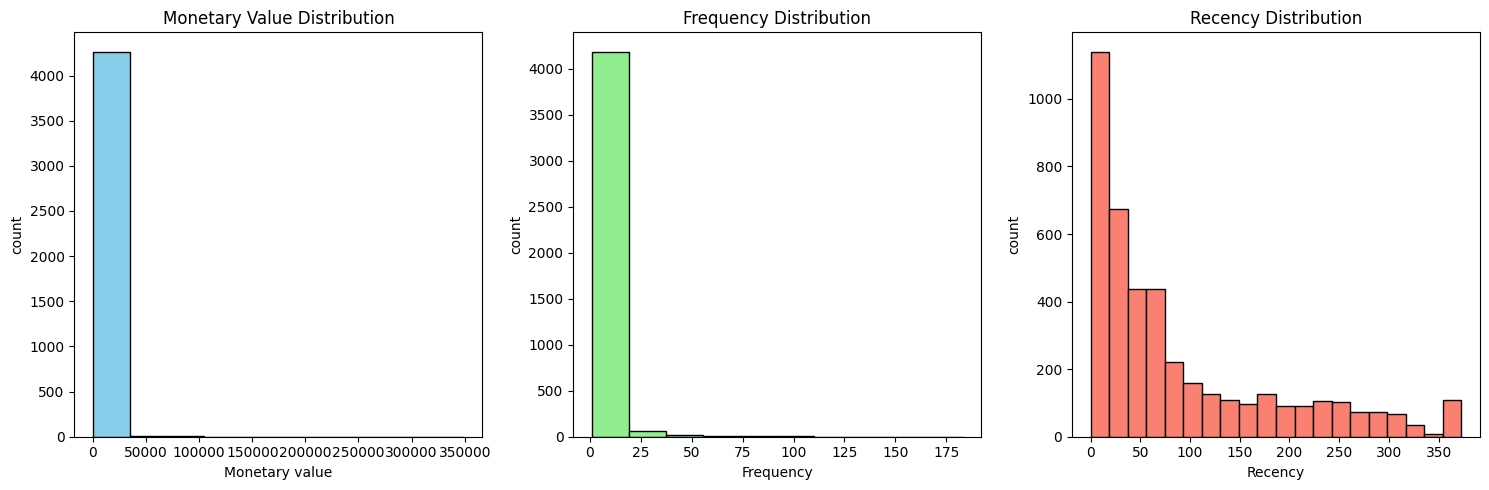

In [97]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
plt.hist(aggregated_df["MonetaryValue"], bins=10, color="skyblue", edgecolor="black")
plt.title("Monetary Value Distribution")
plt.xlabel("Monetary value")
plt.ylabel("count")

plt.subplot(1,3,2)
plt.hist(aggregated_df["Frequency"], bins=10, color="lightgreen", edgecolor="black")
plt.title("Frequency Distribution")
plt.xlabel("Frequency")
plt.ylabel("count")

plt.subplot(1,3,3)
plt.hist(aggregated_df["Recency"], bins=20, color="salmon", edgecolor="black")
plt.title("Recency Distribution")
plt.xlabel("Recency")
plt.ylabel("count")


plt.tight_layout()
plt.show()


from the above there  are some outliers 

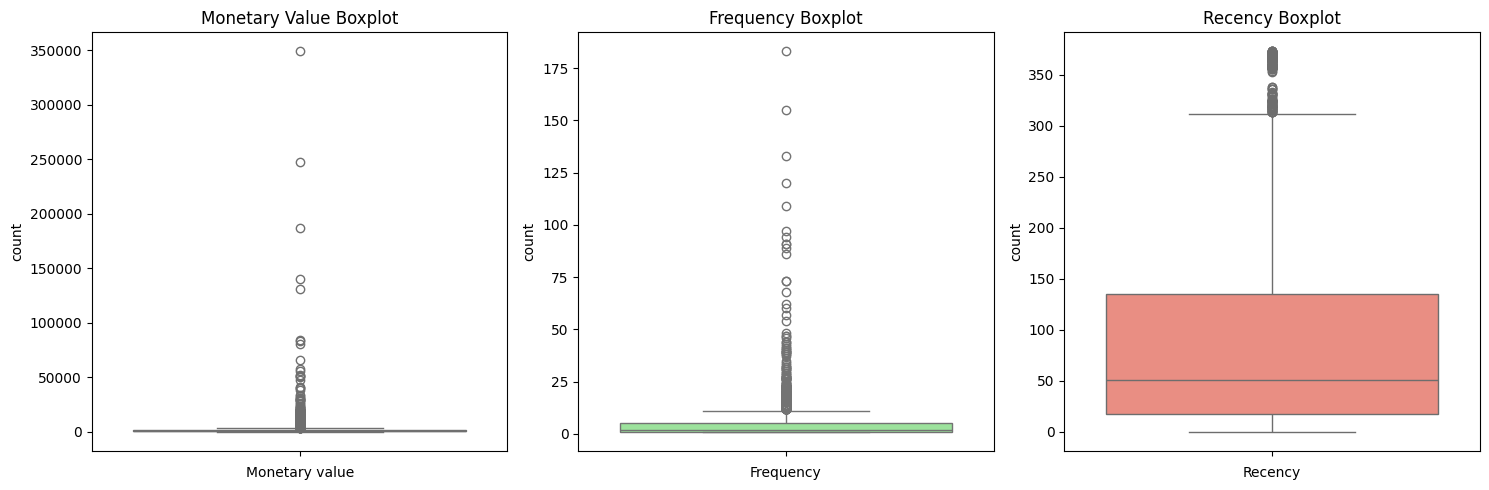

In [98]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(aggregated_df["MonetaryValue"], color="skyblue")
plt.title("Monetary Value Boxplot")
plt.xlabel("Monetary value")
plt.ylabel("count")

plt.subplot(1,3,2)
sns.boxplot(aggregated_df["Frequency"],color="lightgreen")
plt.title("Frequency Boxplot")
plt.xlabel("Frequency")
plt.ylabel("count")

plt.subplot(1,3,3)
sns.boxplot(aggregated_df["Recency"],color="salmon")
plt.title("Recency Boxplot")
plt.xlabel("Recency")
plt.ylabel("count")


plt.tight_layout()
plt.show()

i didnt remove any outliers . i jest copy the outliers for seperate clustering

In [99]:
M_Q1=aggregated_df["MonetaryValue"].quantile(0.25)
M_Q3=aggregated_df["MonetaryValue"].quantile(0.75)
M_IQR=M_Q3 - M_Q1


monetary_outliers_df=aggregated_df[(aggregated_df["MonetaryValue"]>(M_Q3 + 1.5 * M_Q1)) | (aggregated_df["MonetaryValue"]<(M_Q1 - 1.5 * M_Q3))].copy()

monetary_outliers_df.describe()


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,845.00,845.00,845.00,845,845.00
mean,15168.88,7493.47,12.15,2010-11-03 18:47:30.674556160,35.77
min,12349.00,2165.76,1.00,2009-12-10 18:03:00,0.00
25%,13687.00,2721.48,6.00,2010-10-24 12:24:00,6.00
50%,15078.00,3802.04,9.00,2010-11-22 12:26:00,17.00
75%,16655.00,6191.32,13.00,2010-12-03 12:20:00,46.00
max,18287.00,349164.35,183.00,2010-12-09 19:32:00,364.00
std,1716.15,18863.61,15.03,NaN,50.66


In [100]:
F_Q1=aggregated_df["Frequency"].quantile(0.25)
F_Q3=aggregated_df["Frequency"].quantile(0.75)
F_IQR=F_Q3 - F_Q1


frequency_outliers_df=aggregated_df[(aggregated_df["Frequency"]>(F_Q3 + 1.5 * F_Q1)) | (aggregated_df["Frequency"]<(F_Q1 - 1.5 * F_Q3))].copy()

frequency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,742.00,742.00,742.00,742,742.00
mean,15389.62,7421.43,14.23,2010-11-14 03:18:52.075471616,25.42
min,12417.00,97.40,7.00,2010-01-22 11:28:00,0.00
25%,13972.50,2210.71,8.00,2010-11-09 14:29:30,4.00
50%,15418.50,3418.10,10.00,2010-11-25 19:13:00,14.00
75%,16808.25,6128.96,14.00,2010-12-05 15:37:15,30.00
max,18260.00,349164.35,183.00,2010-12-09 19:32:00,321.00
std,1670.46,20123.64,15.40,NaN,38.02


In [101]:
R_Q1=aggregated_df["Recency"].quantile(0.25)
R_Q3=aggregated_df["Recency"].quantile(0.75)
R_IQR=R_Q3 - R_Q1


recency_outliers_df=aggregated_df[(aggregated_df["Recency"]>(R_Q3 + 1.5 * R_Q1)) | (aggregated_df["Recency"]<(R_Q1 - 1.5 * R_Q3))].copy()

recency_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,931.00,931.00,931.00,931,931.00
mean,15440.02,620.33,1.67,2010-04-02 06:12:59.742212608,251.29
min,12346.00,1.55,1.00,2009-12-01 10:49:00,161.00
25%,13938.50,164.64,1.00,2010-02-16 12:23:00,199.00
50%,15454.00,307.10,1.00,2010-04-09 11:03:00,244.00
75%,16967.00,579.55,2.00,2010-05-24 11:49:00,296.00
max,18285.00,34023.26,41.00,2010-07-01 14:38:00,373.00
std,1723.19,1671.25,1.93,NaN,61.59


In [102]:
non_outliers_df=aggregated_df[(~aggregated_df.index.isin(monetary_outliers_df.index)) & (~aggregated_df.index.isin(frequency_outliers_df.index)) & (~aggregated_df.index.isin(recency_outliers_df.index))]
non_outliers_df.describe()

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
count,2371.00,2371.00,2371.00,2371,2371.00
mean,15372.96,717.78,2.47,2010-10-18 23:37:26.646984448,51.57
min,12347.00,3.75,1.00,2010-07-02 10:01:00,0.00
25%,13924.50,305.08,1.00,2010-09-27 14:59:30,18.00
50%,15378.00,574.48,2.00,2010-10-27 11:13:00,43.00
75%,16858.00,1029.29,3.00,2010-11-21 12:47:30,73.00
max,18286.00,2146.39,6.00,2010-12-09 20:01:00,160.00
std,1688.82,517.42,1.44,NaN,39.92


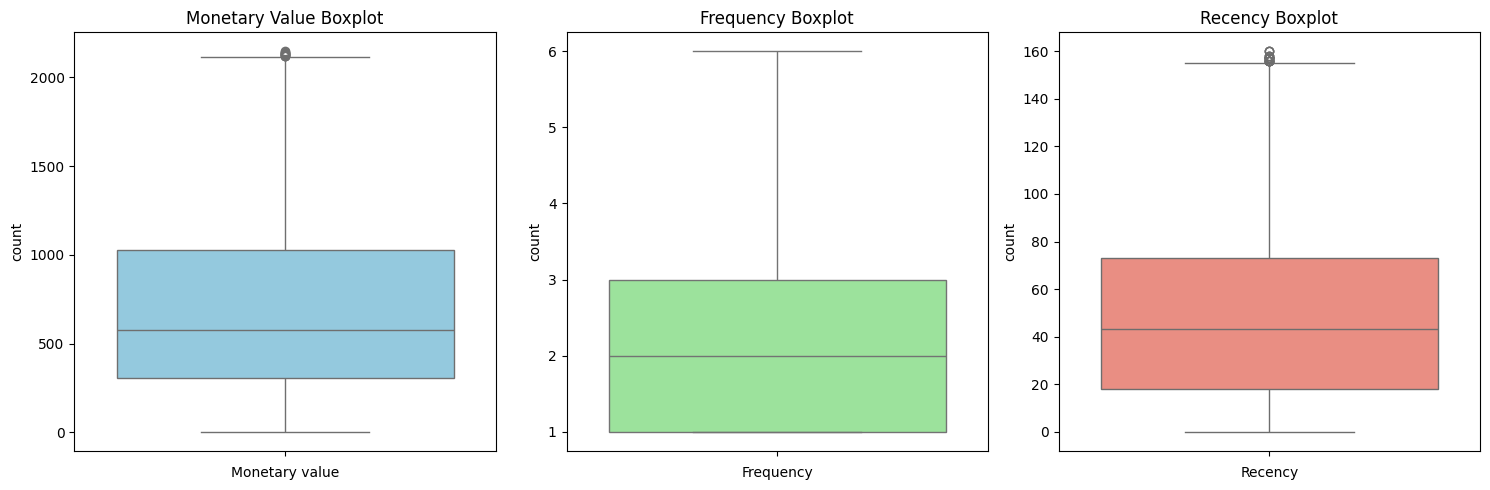

In [103]:
plt.figure(figsize=(15,5))

plt.subplot(1,3,1)
sns.boxplot(data=non_outliers_df["MonetaryValue"], color="skyblue")
plt.title("Monetary Value Boxplot")
plt.xlabel("Monetary value")
plt.ylabel("count")

plt.subplot(1,3,2)
sns.boxplot(data=non_outliers_df["Frequency"],color="lightgreen")
plt.title("Frequency Boxplot")
plt.xlabel("Frequency")
plt.ylabel("count")

plt.subplot(1,3,3)
sns.boxplot(data=non_outliers_df["Recency"],color="salmon")
plt.title("Recency Boxplot")
plt.xlabel("Recency")
plt.ylabel("count")


plt.tight_layout()
plt.show()

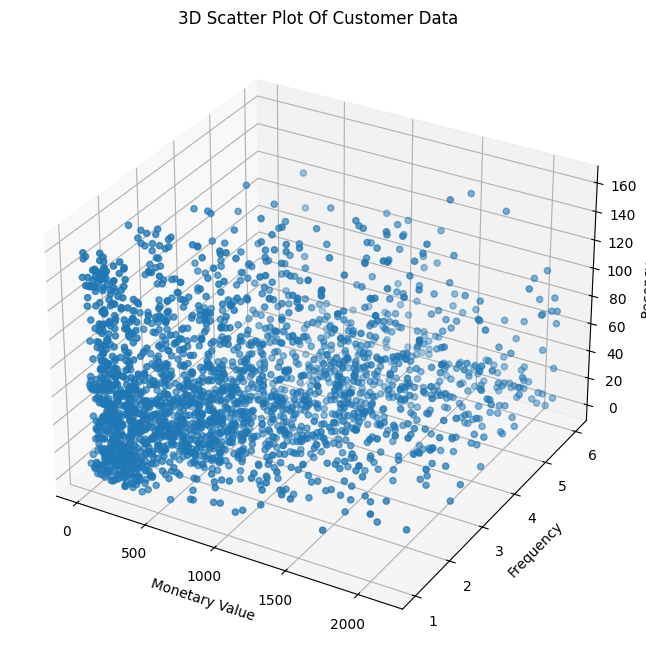

In [ ]:
fig=plt.figure(figsize=(8,8))

ax=fig.add_subplot(projection="3d")

scatter=ax.scatter(non_outliers_df["MonetaryValue"], non_outliers_df["Frequency"], non_outliers_df["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot Of Customer Data")

plt.show()

# StandardScaler

In [105]:
scaler=StandardScaler()

scaled_data=scaler.fit_transform(non_outliers_df[["MonetaryValue","Frequency","Recency"]])

scaled_data

array([[ 1.17055248, -0.32789782, -1.24184084],
       [-0.96001646, -1.02019143,  0.53687718],
       [-0.80581427, -1.02019143, -1.04142191],
       ...,
       [-0.14694158,  2.44127662, -0.86605534],
       [-0.59172511, -1.02019143,  0.36151061],
       [ 1.02191758, -0.32789782,  1.48886711]])

In [106]:
scaled_data_df=pd.DataFrame(scaled_data, index=non_outliers_df.index, columns=("MonetaryValue","Frequency","Recency"))
scaled_data_df

,MonetaryValue,Frequency,Recency
1,1.17,-0.33,-1.24
2,-0.96,-1.02,0.54
4,-0.81,-1.02,-1.04
5,-0.72,-0.33,-1.04
6,-0.77,-1.02,-0.21
...,...,...,...
4277,-0.94,-1.02,2.57
4278,-0.79,-1.02,-0.57
4280,-0.15,2.44,-0.87
4281,-0.59,-1.02,0.36


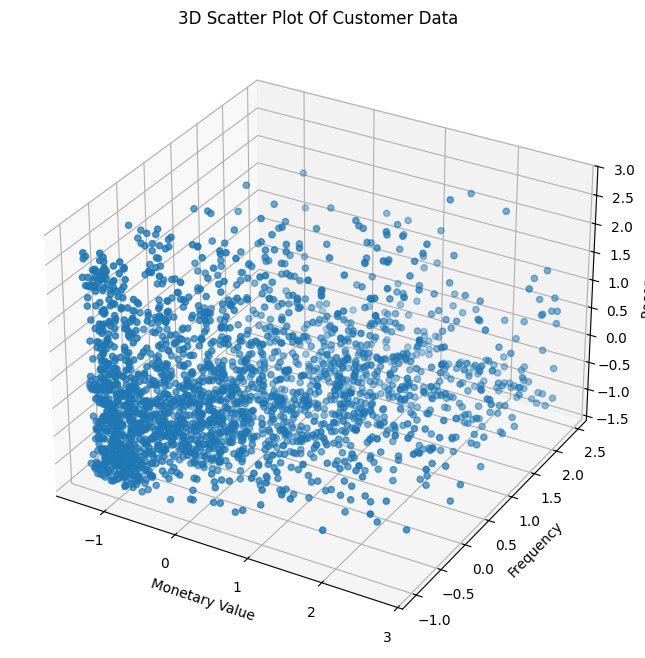

In [107]:
fig=plt.figure(figsize=(8,8))

ax=fig.add_subplot(projection="3d")

scatter=ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot Of Customer Data")

plt.show()

# KMeans Clustering

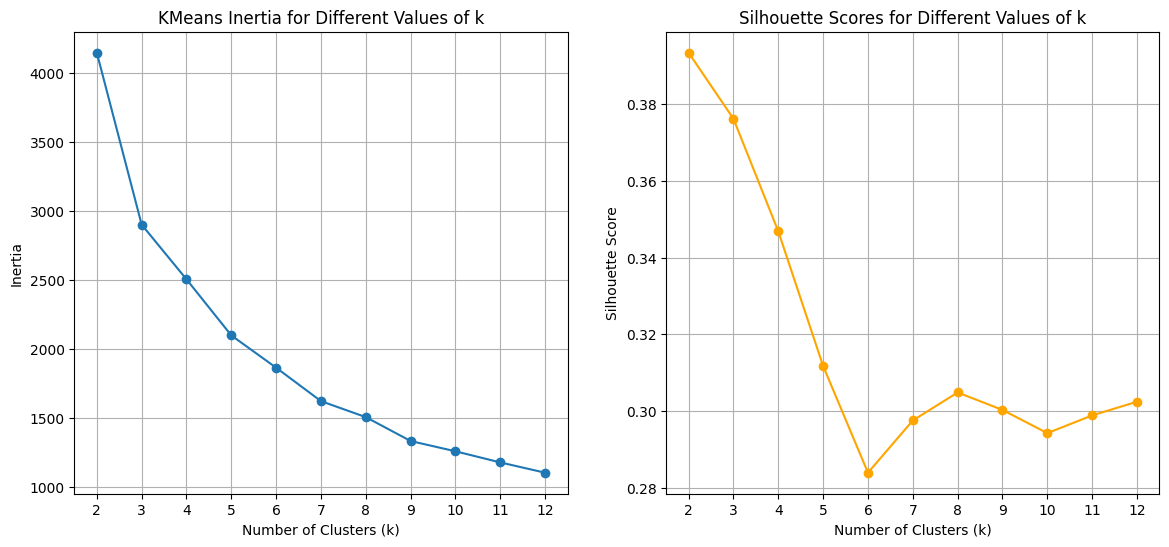

In [108]:


max_k = 12

inertia = []
silhouette_scores = []
k_values = range(2, max_k + 1)

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)
    cluster_labels = kmeans.fit_predict(scaled_data_df)

    # Calculate silhouette score
    sil_score = silhouette_score(scaled_data_df, cluster_labels)
    silhouette_scores.append(sil_score)

    # Store inertia
    inertia.append(kmeans.inertia_)

# Plot results
plt.figure(figsize=(14, 6))

# Inertia Plot
plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title("KMeans Inertia for Different Values of k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.xticks(k_values)
plt.grid(True)

# Silhouette Score Plot (Fixed)
plt.subplot(1, 2, 2)
plt.plot(k_values,silhouette_scores, marker='o', color="orange")  # Fixed list name
plt.title("Silhouette Scores for Different Values of k")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Silhouette Score")
plt.xticks(k_values)
plt.grid(True)

plt.show()


In [110]:
kmeans=KMeans(n_clusters=4, random_state=42, max_iter=1000)

cluster_labels=kmeans.fit_predict(scaled_data_df)

cluster_labels

array([0, 1, 1, ..., 0, 1, 2])

### Create cluster column

In [111]:
non_outliers_df["cluster"]=cluster_labels

non_outliers_df

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_8916\2839330334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  non_outliers_df["cluster"]=cluster_labels


,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,cluster
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,1
4,12351.00,300.93,1,2010-11-29 15:23:00,10,1
5,12352.00,343.80,2,2010-11-29 10:07:00,10,1
6,12353.00,317.76,1,2010-10-27 12:44:00,43,1
...,...,...,...,...,...,...
4277,18279.00,231.34,1,2010-07-08 14:48:00,154,3
4278,18280.00,307.55,1,2010-11-10 15:51:00,29,1
4280,18283.00,641.77,6,2010-11-22 15:30:00,17,0
4281,18284.00,411.68,1,2010-10-04 11:33:00,66,1


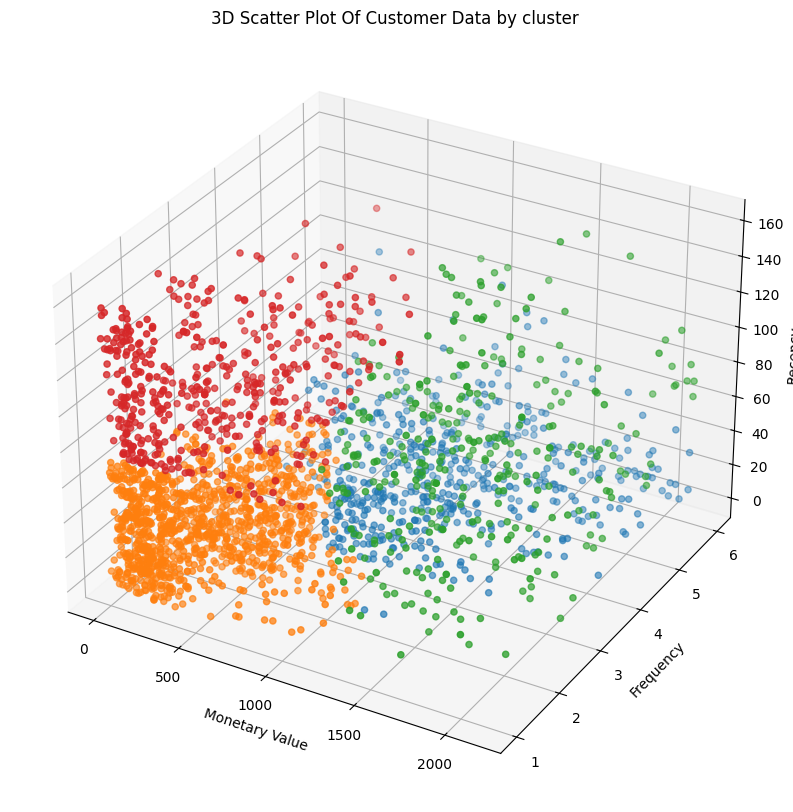

In [114]:
cluster_colors = {
    0: '#1f77b4',  # Blue
    1: '#ff7f0e',  # Orange
    2: '#2ca02c',  # Green (Fixed)
    3: '#d62728'   # Red (Fixed)
}


colors=non_outliers_df["cluster"].map(cluster_colors)




fig=plt.figure(figsize=(10,10))

ax=fig.add_subplot(projection="3d")

scatter=ax.scatter(non_outliers_df["MonetaryValue"], 
                   non_outliers_df["Frequency"], 
                   non_outliers_df["Recency"], 
                   c=colors,  # use mapped solid colors
                   marker="o")

ax.set_xlabel("Monetary Value")
ax.set_ylabel("Frequency")
ax.set_zlabel("Recency")

ax.set_title("3D Scatter Plot Of Customer Data by cluster")

plt.show()

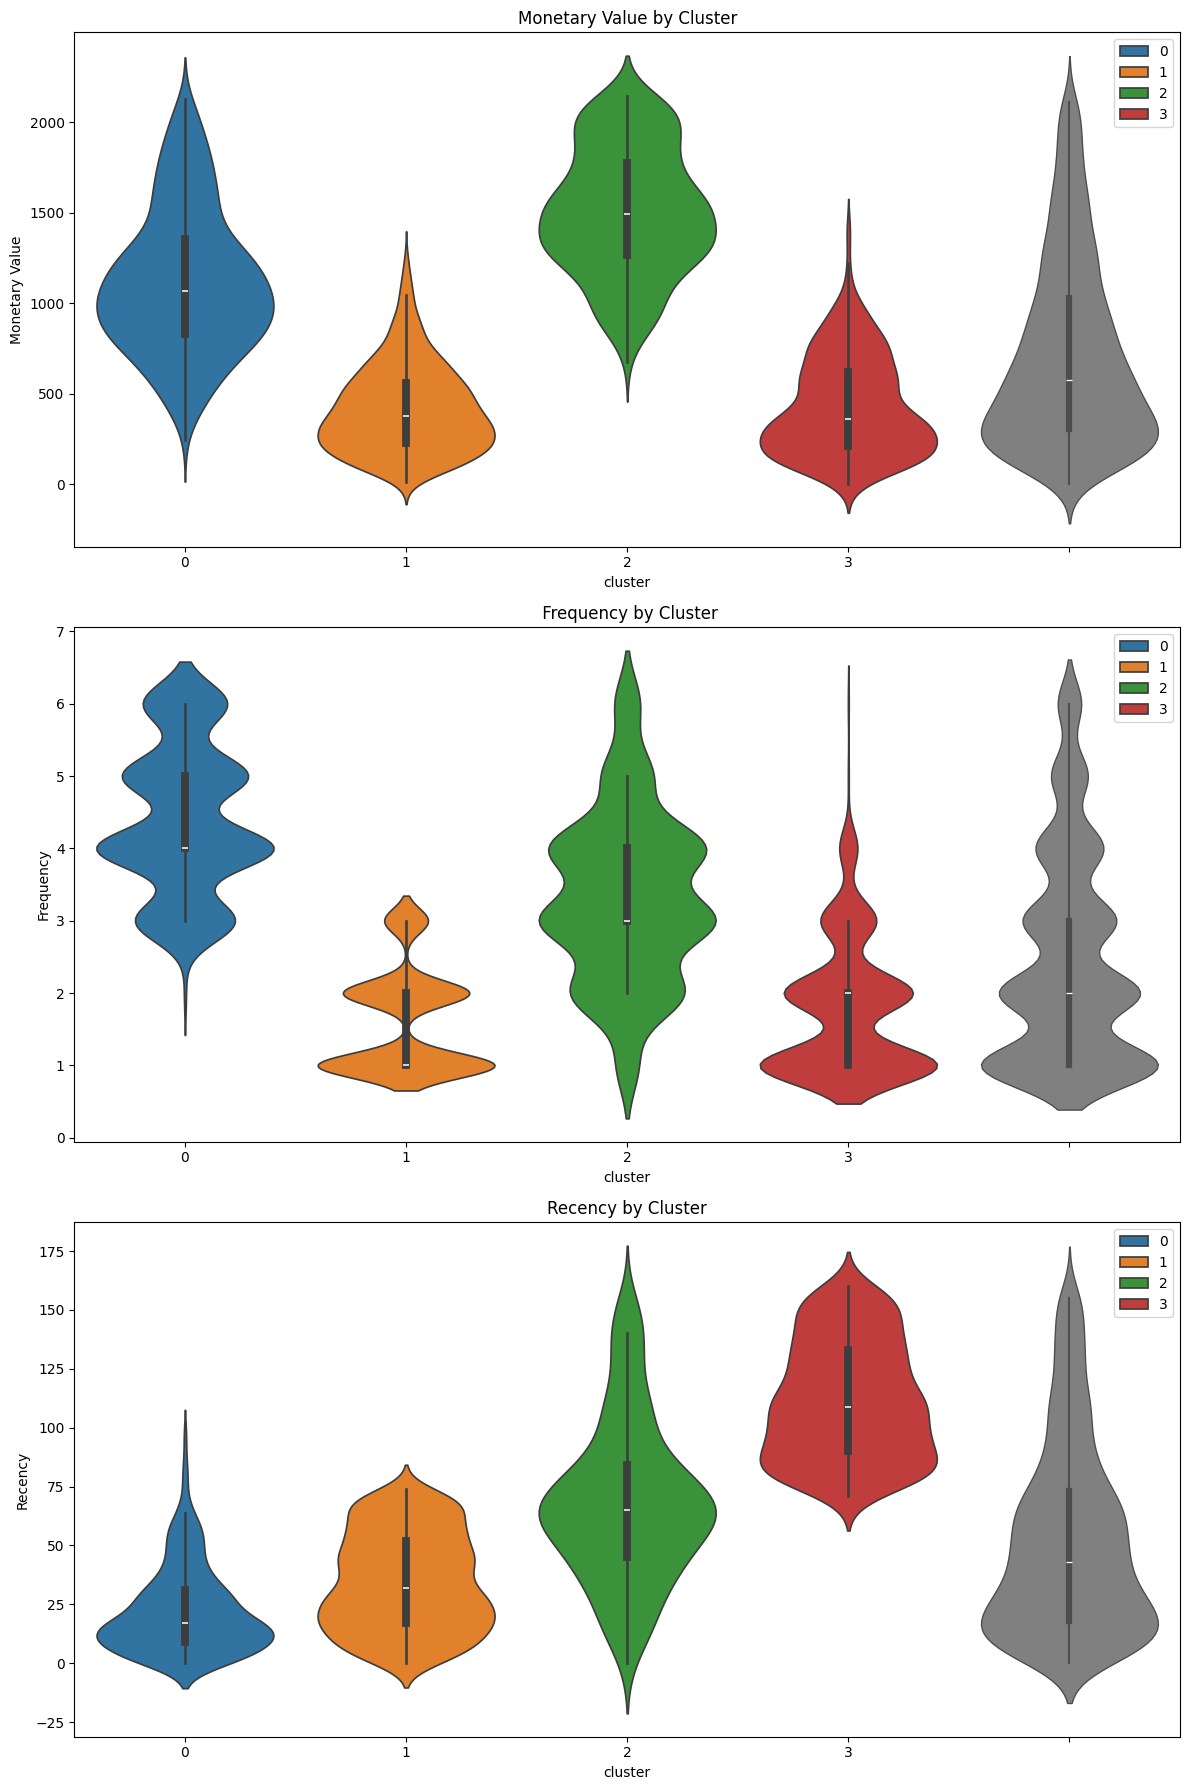

In [118]:
plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=non_outliers_df["cluster"], y=non_outliers_df["MonetaryValue"],palette=cluster_colors, hue=non_outliers_df["cluster"])
sns.violinplot(y=non_outliers_df["MonetaryValue"], color="gray", linewidth=1.0)
plt.title("Monetary Value by Cluster")
plt.ylabel("Monetary Value")


plt.subplot(3,1,2)
sns.violinplot(x=non_outliers_df["cluster"], y=non_outliers_df["Frequency"],palette=cluster_colors, hue=non_outliers_df["cluster"])
sns.violinplot(y=non_outliers_df["Frequency"], color="gray", linewidth=1.0)
plt.title(" Frequency by Cluster")
plt.ylabel("Frequency")


plt.subplot(3,1,3)
sns.violinplot(x=non_outliers_df["cluster"], y=non_outliers_df["Recency"],palette=cluster_colors, hue=non_outliers_df["cluster"])
sns.violinplot(y=non_outliers_df["Recency"], color="gray", linewidth=1.0)
plt.title("Recency by Cluster")
plt.ylabel("Recency")


plt.tight_layout()
plt.show()

1. Cluster 0(Blue): "Retain"

     * Retionale: This Cluster Represents high-value customers who purchase regularly ,through not always very recently. the focus should be on retention efforts to maintain their loyality and spending levels.

     * Action: Implement loyality programs, personalized offers, and regular engagement to ensure they remain activity.

2. Cluster 1(Orange): "Re-Engage"

      * Retionale: this group includes lower-value, infrequent buyers who haven't purchased recently. The focus should be on re engagement to bring them back into active purchasing behavior.
      * Action: Use targetted marketting campeigns, special discounts, or remainders to encorage them to return and purchase again.

3. cluster 2(Green): "Nurture"

      * Retionale: This clusters represents the least active and lowest-value customers, but they have made recent purchases. These customers may be new or need nurturing  to increase their engagement and spending.
      * Action: Focus on building relationship, providing excellent customer service, and offering incentives to encourage more frequent purchases.

4. cluster 3(Red): "Reward"

      * Retionale: This cluster includes high-value, and very frequent buyers, many of whom are still actively purchasing. They are your most loyal Customers, and rewarding their loyality is key to maintaining their engagement.
      * Action: Implement a robust loyality program, provide exclusive offers, recognize their loyality to keep them engaged and satisfied

### Summery of Clusters:

* Cluster 0: "Retain"
* Cluster 1: "Re-Engage"
* Cluster 2: "Nurture"
* Cluster 3: "Reward"

In [119]:
overlap_indices= monetary_outliers_df.index.intersection(frequency_outliers_df.index)

monetary_only_outliers=monetary_outliers_df.drop(overlap_indices)
frequency_only_outliers=frequency_outliers_df.drop(overlap_indices)
monetary_and_frequency_outliers=monetary_outliers_df.loc[overlap_indices]

monetary_only_outliers["cluster"]=-1
frequency_only_outliers["cluster"]=-2
monetary_and_frequency_outliers["cluster"]=-3


outlier_clusters_df=pd.concat([monetary_only_outliers, frequency_only_outliers,monetary_and_frequency_outliers])

outlier_clusters_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,cluster
3,12349.00,2221.14,2,2010-10-28 08:23:00,42,-1
8,12356.00,3126.25,3,2010-11-24 12:24:00,15,-1
9,12357.00,11229.99,1,2010-11-16 10:05:00,23,-1
10,12358.00,2519.01,3,2010-11-29 10:56:00,10,-1
11,12359.00,2563.36,6,2010-10-10 11:16:00,60,-1
...,...,...,...,...,...,...
4239,18229.00,3526.81,10,2010-12-08 10:51:00,1,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3
4250,18245.00,3757.92,13,2010-11-25 16:52:00,14,-3
4253,18251.00,21964.14,8,2010-09-20 13:26:00,80,-3


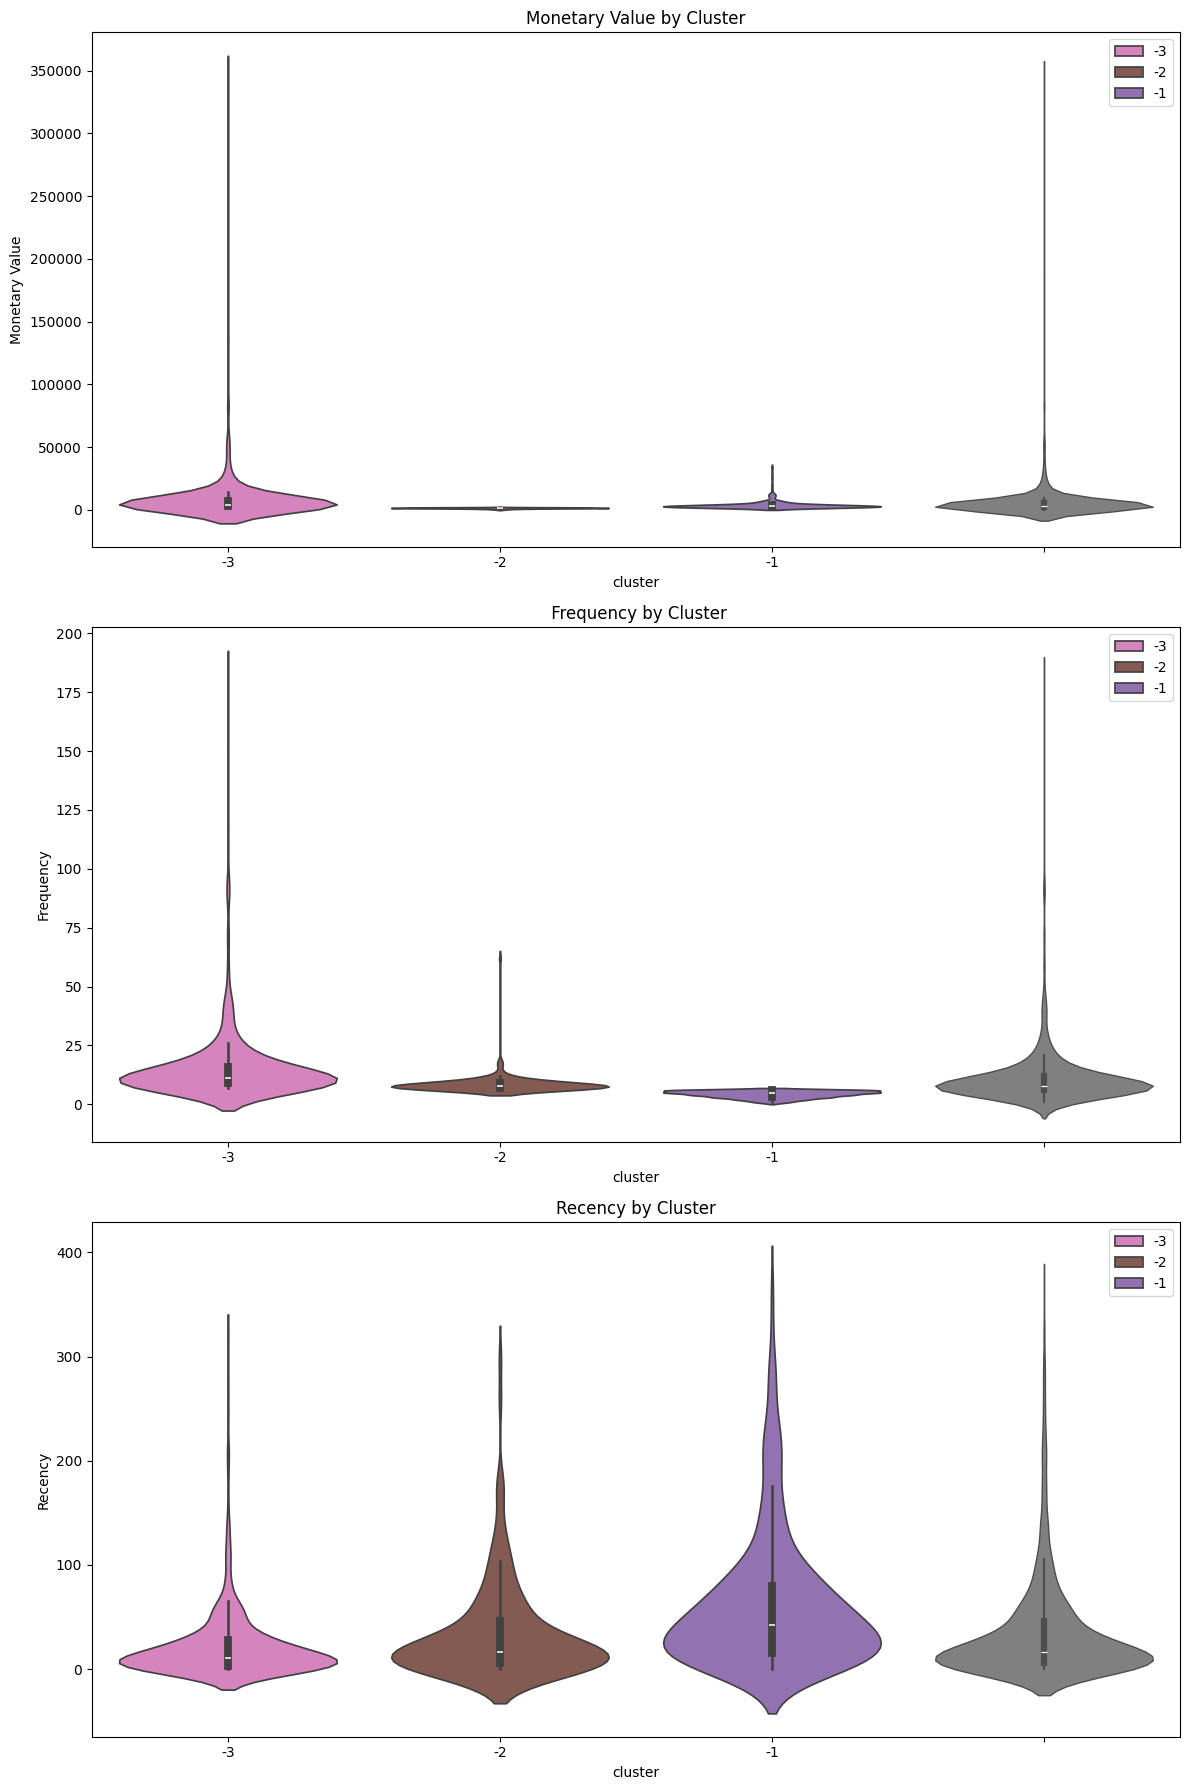

In [120]:
cluster_colors = {
    -1: '#9467bd',  
    -2: '#8c564b',  
    -3: '#e377c2'
}



plt.figure(figsize=(12,18))

plt.subplot(3,1,1)
sns.violinplot(x=outlier_clusters_df["cluster"], y=outlier_clusters_df["MonetaryValue"],palette=cluster_colors, hue=outlier_clusters_df["cluster"])
sns.violinplot(y=outlier_clusters_df["MonetaryValue"], color="gray", linewidth=1.0)
plt.title("Monetary Value by Cluster")
plt.ylabel("Monetary Value")


plt.subplot(3,1,2)
sns.violinplot(x=outlier_clusters_df["cluster"], y=outlier_clusters_df["Frequency"],palette=cluster_colors, hue=outlier_clusters_df["cluster"])
sns.violinplot(y=outlier_clusters_df["Frequency"], color="gray", linewidth=1.0)
plt.title(" Frequency by Cluster")
plt.ylabel("Frequency")


plt.subplot(3,1,3)
sns.violinplot(x=outlier_clusters_df["cluster"], y=outlier_clusters_df["Recency"],palette=cluster_colors, hue=outlier_clusters_df["cluster"])
sns.violinplot(y=outlier_clusters_df["Recency"], color="gray", linewidth=1.0)
plt.title("Recency by Cluster")
plt.ylabel("Recency")


plt.tight_layout()
plt.show()

1. Cluster -1(Motetary Outliers): "PAMPER"

       * Charecteristics: High spenders but not necessarily frequent buyers. Their purchase are large but infrequent.
       * Potential Stretegy: Focus on maintaining their loyality with personalized offers or luxury service that cater to their high spending capacity.

2. Cluster -2(Frequency outliers): "UPSELL"

       * Charecteristics: Frequent buyers who spend less per purchase . These customers are consistenly engaged but might benefits from upselling oppertunities.
       * Potential Stretegy: Implemetn loyality programs or bundle deals to encorage higher spending per visit, given their frequent engagement.

3. Cluster -3(Monetary & Frequent Outliers): "DELIGHT"
       
       * Charecteristics: The most valuable outliers, with extreme spending and frequent purchase. they are likely you top-tier customers who require special attention.
       * Potential Stretegy: Develop VIP programs or exclusive offers to maintain their loyality and encourage continued engagement.


In [121]:
cluster_labels={
    0: "RETAIN",
    1: "RE-ENGAGE",
    2: "NURTURE",
    3: "REWARD",
    -1: "PAMPER",
    -2: "UPSELL",
    -3: "DELIGHT"
}

CONCADINATE both non-outliers clusters and outliers clusters

In [122]:
full_clustering_df=pd.concat([non_outliers_df,outlier_clusters_df])
full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,cluster
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0
2,12348.00,221.16,1,2010-09-27 14:59:00,73,1
4,12351.00,300.93,1,2010-11-29 15:23:00,10,1
5,12352.00,343.80,2,2010-11-29 10:07:00,10,1
6,12353.00,317.76,1,2010-10-27 12:44:00,43,1
...,...,...,...,...,...,...
4239,18229.00,3526.81,10,2010-12-08 10:51:00,1,-3
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3
4250,18245.00,3757.92,13,2010-11-25 16:52:00,14,-3
4253,18251.00,21964.14,8,2010-09-20 13:26:00,80,-3


In [123]:
full_clustering_df["ClusterLabel"]=full_clustering_df["cluster"].map(cluster_labels)
full_clustering_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,cluster,ClusterLabel
1,12347.00,1323.32,2,2010-12-07 14:57:00,2,0,RETAIN
2,12348.00,221.16,1,2010-09-27 14:59:00,73,1,RE-ENGAGE
4,12351.00,300.93,1,2010-11-29 15:23:00,10,1,RE-ENGAGE
5,12352.00,343.80,2,2010-11-29 10:07:00,10,1,RE-ENGAGE
6,12353.00,317.76,1,2010-10-27 12:44:00,43,1,RE-ENGAGE
...,...,...,...,...,...,...,...
4239,18229.00,3526.81,10,2010-12-08 10:51:00,1,-3,DELIGHT
4241,18231.00,4791.80,23,2010-10-29 14:17:00,41,-3,DELIGHT
4250,18245.00,3757.92,13,2010-11-25 16:52:00,14,-3,DELIGHT
4253,18251.00,21964.14,8,2010-09-20 13:26:00,80,-3,DELIGHT


# Visualization

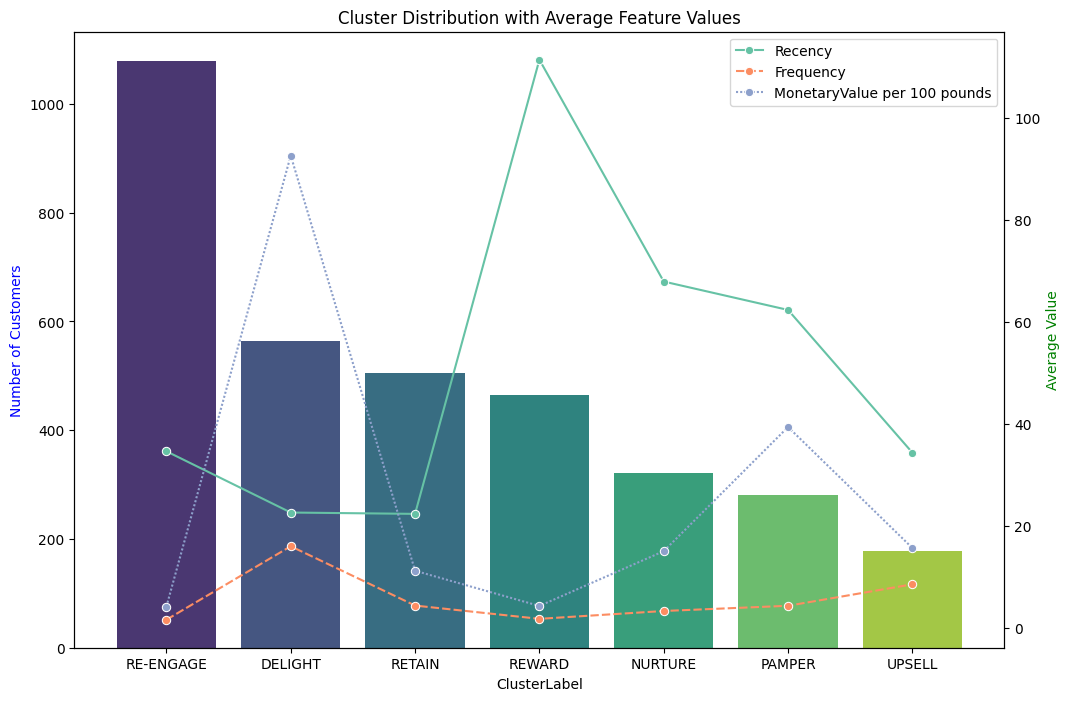

In [134]:
cluster_counts=full_clustering_df["ClusterLabel"].value_counts()
full_clustering_df["MonetaryValue per 100 pounds"]=full_clustering_df["MonetaryValue"]/100.00
feature_means=full_clustering_df.groupby("ClusterLabel")[["Recency","Frequency","MonetaryValue per 100 pounds"]].mean()

fig,ax1=plt.subplots(figsize=(12,8))

sns.barplot(x=cluster_counts.index,y=cluster_counts.values, ax=ax1, palette="viridis",hue=cluster_counts.index)
ax1.set_ylabel("Number of Customers", color="b")
ax1.set_title("Cluster Distribution with Average Feature Values")


ax2=ax1.twinx()

sns.lineplot(data=feature_means,ax=ax2, palette="Set2", marker='o')
ax2.set_ylabel("Average Value", color='g')

plt.show()

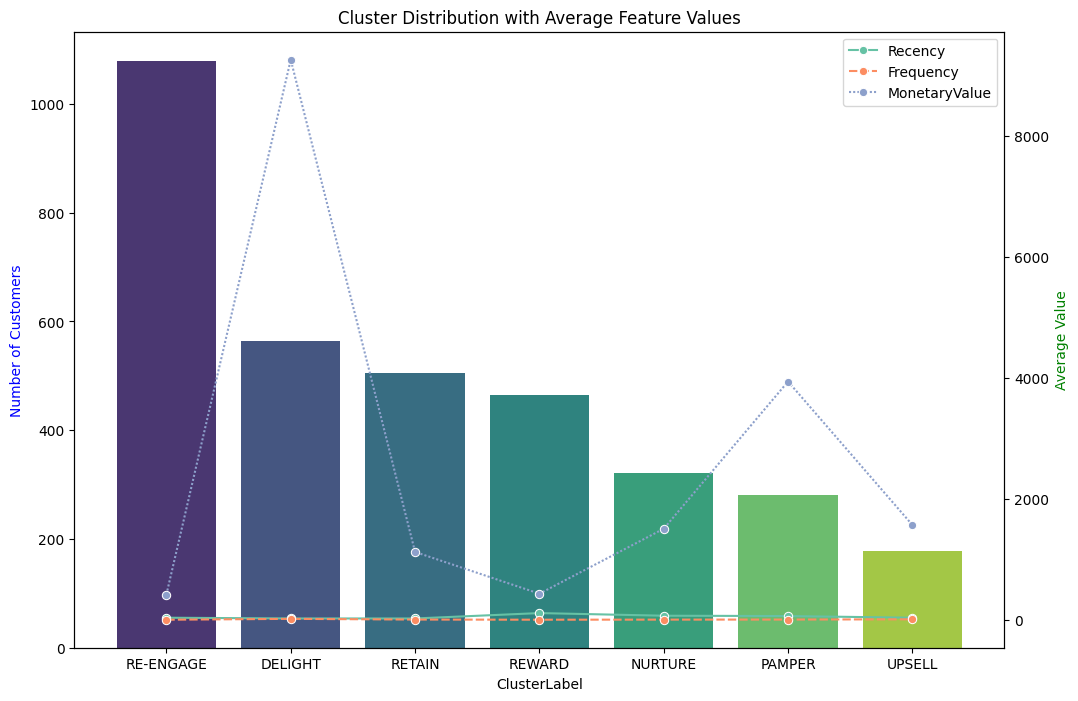

In [135]:
cluster_counts=full_clustering_df["ClusterLabel"].value_counts()

feature_means=full_clustering_df.groupby("ClusterLabel")[["Recency","Frequency","MonetaryValue"]].mean()

fig,ax1=plt.subplots(figsize=(12,8))

sns.barplot(x=cluster_counts.index,y=cluster_counts.values, ax=ax1, palette="viridis",hue=cluster_counts.index)
ax1.set_ylabel("Number of Customers", color="b")
ax1.set_title("Cluster Distribution with Average Feature Values")


ax2=ax1.twinx()

sns.lineplot(data=feature_means,ax=ax2, palette="Set2", marker='o')
ax2.set_ylabel("Average Value", color='g')

plt.show()